<a href="https://colab.research.google.com/github/nada-086/Airbnb-Listing-EDA/blob/main/Airbnb_Listing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [99]:
data = pd.read_csv('/content/listings.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


In [100]:
# Discovering The Data
data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,7.608000e+03,7.608000e+03,0.0,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,6898.000000,7608.000000,7608.000000,7608.000000
mean,2.328487e+17,1.032177e+08,NaN,52.366725,4.889936,251.065589,4.914564,47.499211,1.170351,1.798896,79.586619,11.798896
std,3.489604e+17,1.393419e+08,NaN,0.017068,0.035059,263.170218,33.263777,106.402516,2.353310,2.590756,106.483001,33.469905
min,2.818000e+03,3.159000e+03,NaN,52.290340,4.755710,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.696009e+07,9.937172e+06,NaN,52.355890,4.866060,148.000000,2.000000,3.000000,0.270000,1.000000,0.000000,0.000000
50%,3.822749e+07,3.501297e+07,NaN,52.365980,4.887770,202.000000,3.000000,11.000000,0.560000,1.000000,21.000000,3.000000
75%,6.525168e+17,1.402245e+08,NaN,52.376470,4.908300,300.000000,4.000000,40.000000,1.260000,1.000000,145.000000,9.000000
max,9.071470e+17,5.183111e+08,NaN,52.425120,5.026430,12000.000000,1001.000000,2720.000000,114.930000,22.000000,365.000000,1626.000000


In [101]:
# It is obvious that the neighbourhood_group feature is always NaN. So, It's dropped.
data.drop(['neighbourhood_group'], axis=1, inplace=True)
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


# Distributions

In [102]:
# Visualizing Room Type
# It is obvious that the Entire home/apt is the most common type
count = data['room_type'].value_counts()
fig = px.pie(data, values=count, names=count.index, title='Room Type')
fig.show()

In [103]:
# Visualizing Price
# It is obvious that the rooms of price in range [140, 159] is more common
# Also, The rooms with price exceeding the 2k is rarely used.
max = data['price'].max()
fig = px.histogram(data, x='price', title='Price')
fig.update_xaxes(range=[0, max])

array([[<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'reviews_per_month'}>],
       [<Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>]], dtype=object)

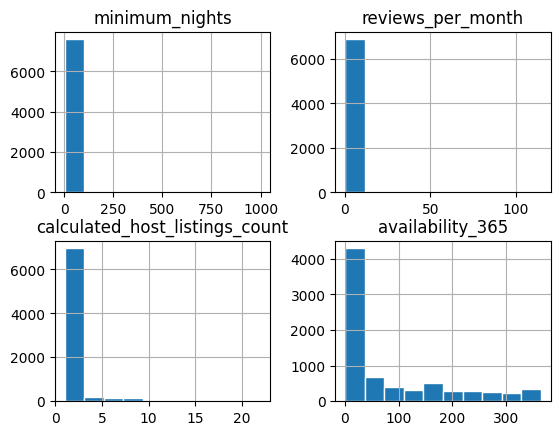

In [105]:
df = data[['minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
df.hist(edgecolor='white')

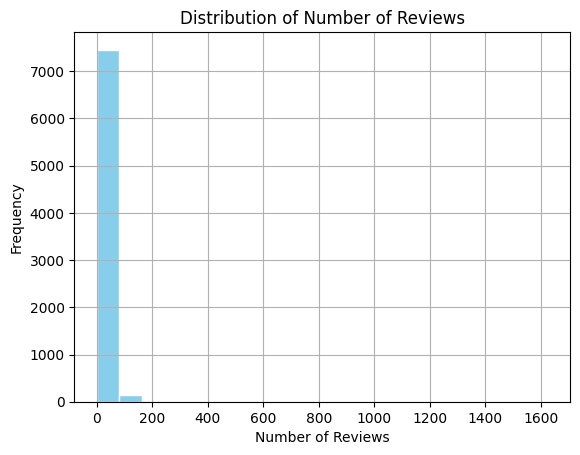

In [106]:
# Showing the Number of Reviews in the Last 12 Months
# A significant portion of the listings has very few reviews in the last 12 months.
plt.hist(data['number_of_reviews_ltm'], bins=20, color='skyblue', edgecolor='white')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Reviews')
plt.grid(True)
plt.show()

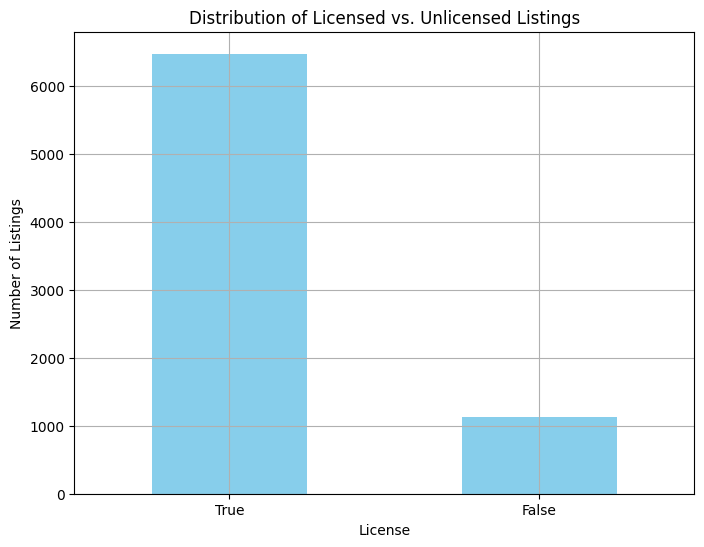

In [122]:
# Liscend vs Non-Liscend
license_counts = data['license'].map({np.nan: False}).fillna(True)
license_counts = license_counts.value_counts()
plt.figure(figsize=(8, 6))
license_counts.plot(kind='bar', color='skyblue')
plt.xlabel('License')
plt.ylabel('Number of Listings')
plt.title('Distribution of Licensed vs. Unlicensed Listings')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Relationships

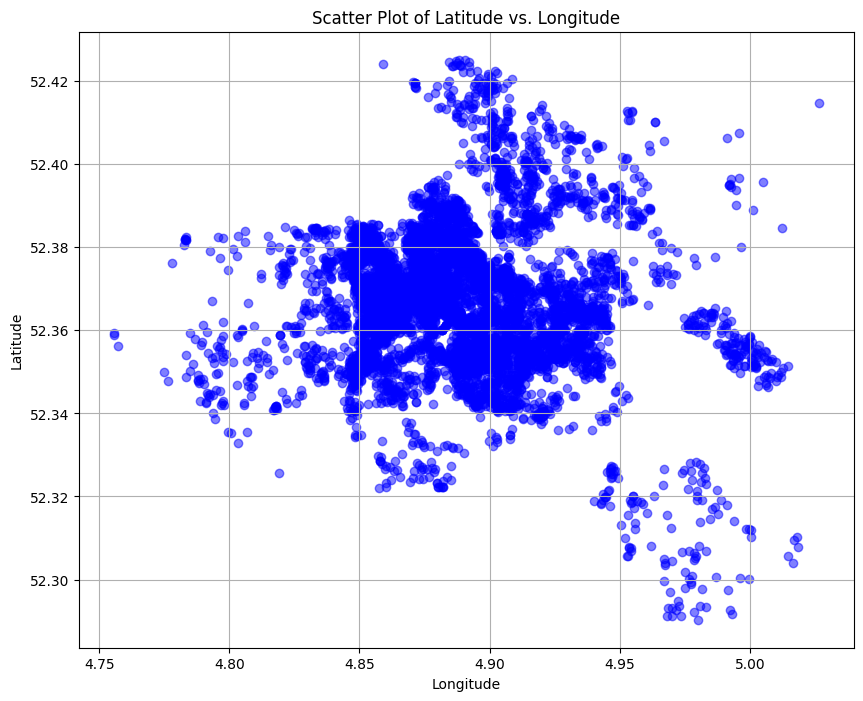

In [110]:
# Latitude and Longitude
# There is a high population in the center.
plt.figure(figsize=(10, 8))
plt.scatter(data['longitude'], data['latitude'], alpha=0.5, c='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.grid(True)
plt.show()

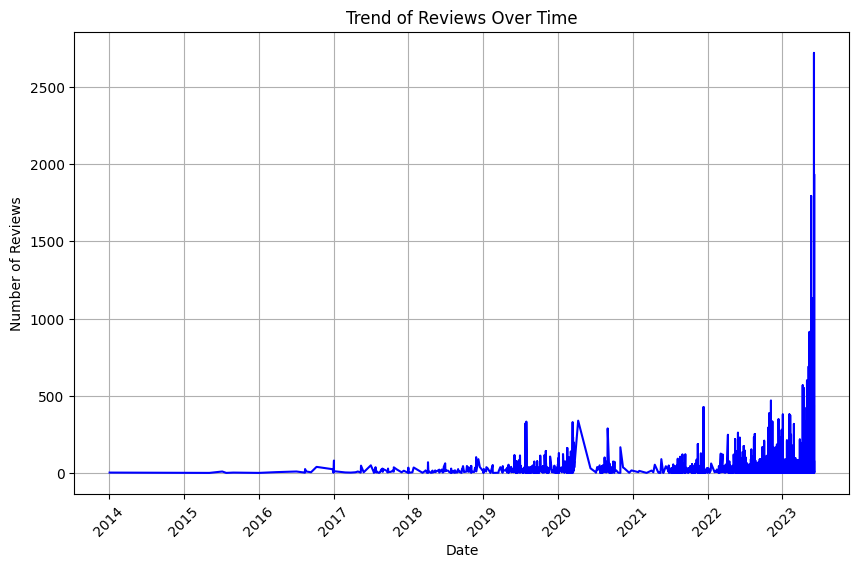

In [104]:
# Visualizing The Trend of Reviews
# It is obvious that in the past the people didn't care about reviewing the service
# Also, The Trend of giving a feedback is increasing nowadays.
data['last_review'] = pd.to_datetime(data['last_review'])
data.sort_values('last_review', inplace=True)
plt.figure(figsize=(10, 6))
plt.plot(data['last_review'], data['number_of_reviews'], linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Trend of Reviews Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-123-c31e62a14a5f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



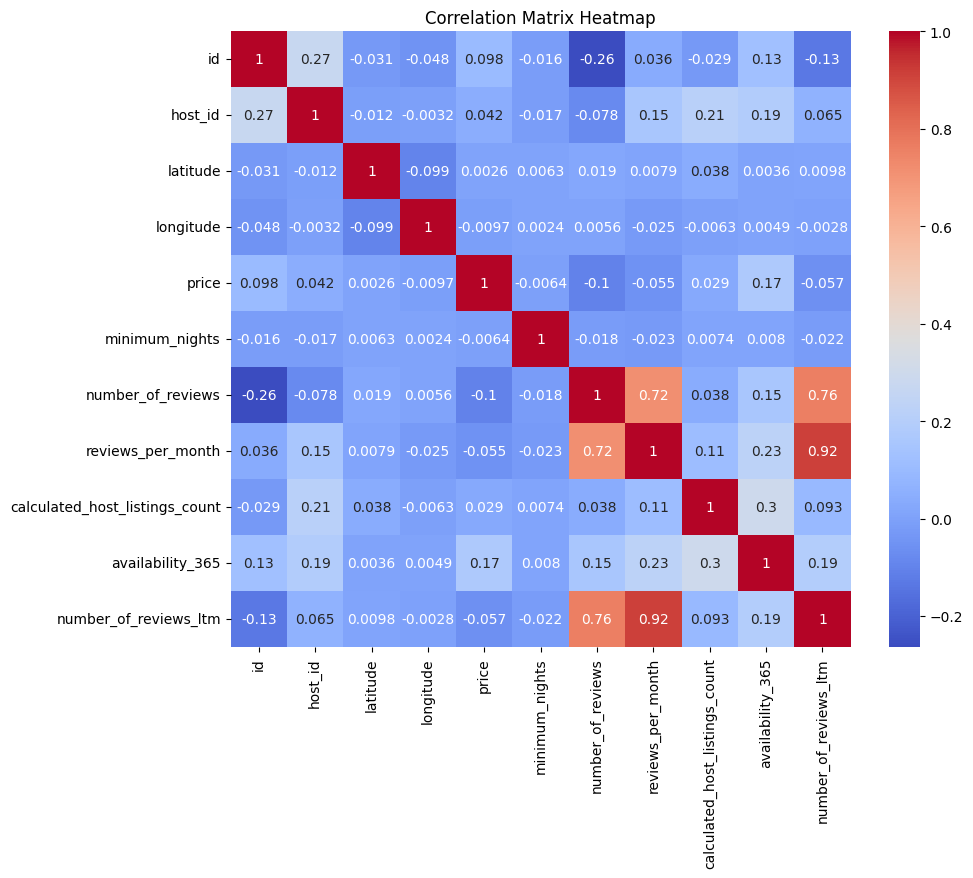

In [123]:
# Correlation Between Columns
# The Higly Correlated Features
# reviews_per_month & number_of_reviews
# number_of_reviews_ltm & number_of_reviews
# reviews_per_month & number_of_reviews_ltm
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

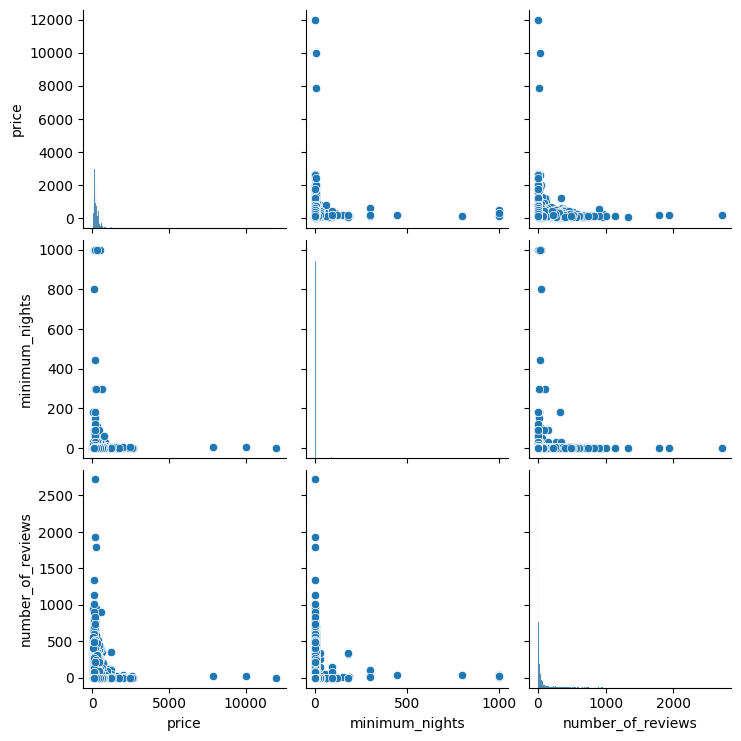

In [124]:
# Inversly relation between the price and the number of reviews
sns.pairplot(data[['price', 'minimum_nights', 'number_of_reviews']])
plt.show()

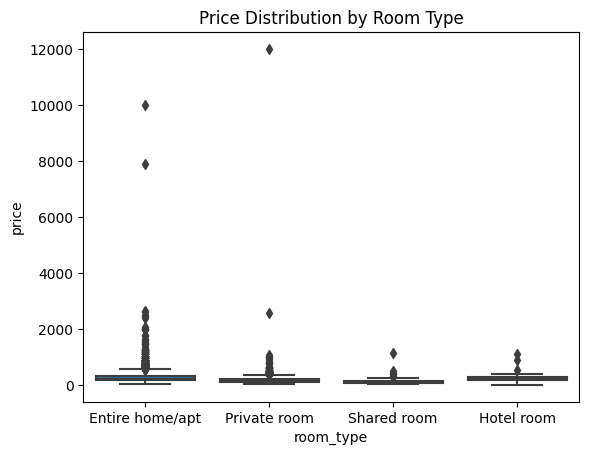

In [125]:
sns.boxplot(data=data, x='room_type', y='price')
plt.title('Price Distribution by Room Type')
plt.show()

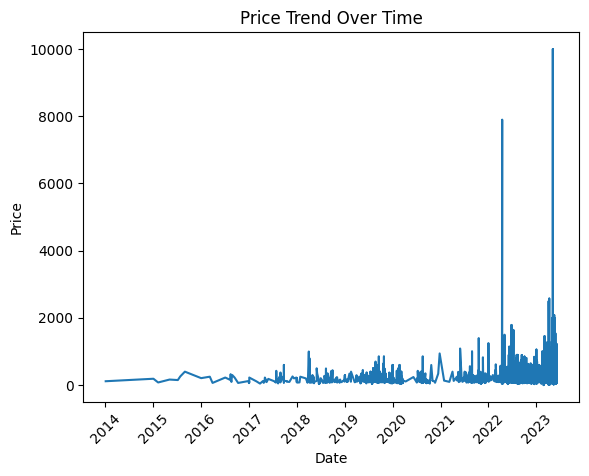

In [126]:
data['last_review'] = pd.to_datetime(data['last_review'])
data.sort_values('last_review', inplace=True)
plt.plot(data['last_review'], data['price'])
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()